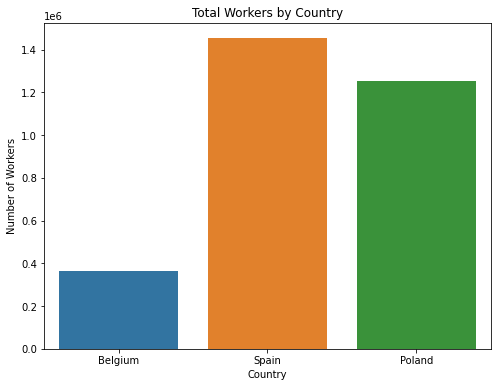

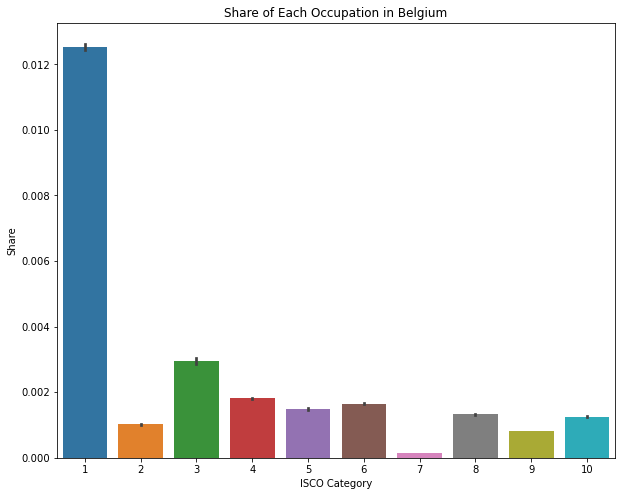

<Figure size 864x648 with 0 Axes>

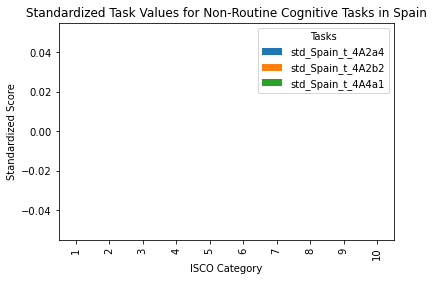

      TIME European Union - 28 countries (2013-2020)  Belgium  Czechia  \
0  2011-Q1                                  210428.6   4418.6   4758.8   
1  2011-Q2                                  212606.7   4508.3   4800.2   
2  2011-Q3                                  213154.9   4452.9   4819.7   
3  2011-Q4                                  211867.3   4502.1   4806.9   
4  2012-Q1                                  209511.3   4451.4   4759.6   

   Denmark    Spain    Italy  Lithuania   Poland  Finland  ...  t_4A3b5_rev  \
0   2570.1  18277.7  22156.6     1206.9  15126.8   2366.7  ...     4.270759   
1   2605.0  18475.7  22335.5     1227.8  15331.7   2468.5  ...     4.270759   
2   2606.6  18337.8  22196.1     1233.7  15440.9   2468.6  ...     4.270759   
3   2568.8  17992.4  22171.5     1234.5  15351.7   2410.0  ...     4.270759   
4   2549.1  17615.5  22030.3     1222.4  15149.6   2383.4  ...     4.270759   

   std_Belgium_t_4A2a4  std_Spain_t_4A2a4  std_Poland_t_4A2a4  \
0              

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the path to the parent directory of RR classes
os.chdir("C:\\Users\\mugil\\Desktop\\RR\\RRcourse2024")

# Load task data from the O*NET database already cross-walked to ISCO-08
task_data = pd.read_csv("Data\\onet_tasks.csv")

# Load employment data from Eurostat, which includes data for each 1-digit ISCO occupation category
isco_data = pd.read_excel("Data\\Eurostat_employment_isco.xlsx", sheet_name=None)

# Assign an ISCO category to each DataFrame and combine them into a single DataFrame
all_data = pd.concat([df.assign(ISCO=i) for i, df in enumerate(isco_data.values(), start=1)], ignore_index=True)

# Define the countries of interest
countries = ["Belgium", "Spain", "Poland"]

# Calculate and merge total workers for each country into the combined DataFrame
total_workers = {country: all_data[country].sum() for country in countries}
for country in countries:
    all_data[f"total_{country}"] = total_workers[country]
    all_data[f"share_{country}"] = all_data[country] / all_data[f"total_{country}"]

# Extract the first digit of the ISCO variable to simplify task data
task_data["isco08_1dig"] = task_data["isco08"].astype(str).str[:1].astype(int)

# Calculate the mean task values at a 1-digit level and drop the original 'isco08' column
aggdata = task_data.groupby("isco08_1dig").mean().drop(columns=["isco08"])

# Merge the task data with employment data
combined = pd.merge(all_data, aggdata, left_on='ISCO', right_index=True, how='left')

# Identify and standardize task variables of interest based on non-routine cognitive analytical tasks
tasks_of_interest = ["t_4A2a4", "t_4A2b2", "t_4A4a1"]
for task in tasks_of_interest:
    for country in countries:
        mean_task = np.average(combined[task], weights=combined[f"share_{country}"])
        std_task = np.sqrt(np.average((combined[task] - mean_task)**2, weights=combined[f"share_{country}"]))
        combined[f"std_{country}_{task}"] = (combined[task] - mean_task) / std_task

# Plot total workers by country
plt.figure(figsize=(8, 6))
sns.barplot(x=list(total_workers.keys()), y=list(total_workers.values()))
plt.title('Total Workers by Country')
plt.ylabel('Number of Workers')
plt.xlabel('Country')
plt.show()

# Plot the share of each occupation in Belgium
belgium_shares = all_data[all_data['Belgium'] > 0][['ISCO', 'share_Belgium']].drop_duplicates()
plt.figure(figsize=(10, 8))
sns.barplot(x='ISCO', y='share_Belgium', data=belgium_shares)
plt.title('Share of Each Occupation in Belgium')
plt.ylabel('Share')
plt.xlabel('ISCO Category')
plt.show()

# Standardized task values for non-routine cognitive analytical tasks in Spain
spain_tasks = combined[['ISCO', 'std_Spain_t_4A2a4', 'std_Spain_t_4A2b2', 'std_Spain_t_4A4a1']].drop_duplicates()
plt.figure(figsize=(12, 9))
spain_tasks.set_index('ISCO').plot(kind='bar')
plt.title('Standardized Task Values for Non-Routine Cognitive Tasks in Spain')
plt.ylabel('Standardized Score')
plt.xlabel('ISCO Category')
plt.legend(title='Tasks')
plt.show()

# Display the first few rows of the combined DataFrame for verification
print(combined.head())
